In [160]:
import re
seq = 'AGCTAGCTTTTGATCGATC'

vector = ''
for n in range(2, 10):
    for let1 in ['A', 'C', 'G', 'T']:
        for let2 in ['A', 'C', 'G', 'T']:
            st = '[' + let1 + ']\w{' + str(n) + '}[' + let2 + ']'
            rep = re.findall(st, seq)
            vector += str(len(rep))
print(vector)

00120012120121112001020100211112001200111101111102011001001211110011000111011111100101010001111100010010010111010101100000100101


In [299]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

In [935]:
data = pd.read_csv('/home/nkureev/Features.csv', header=None)

In [936]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,30,2,0,1,2,1,0,0,4,0,...,1,4,0,1,0,0,4,4,-0.145,1
1,33,3,0,1,2,1,1,0,4,1,...,1,4,0,1,1,6,5,0,0.865,1
2,30,2,0,0,3,0,0,0,2,1,...,1,1,0,0,0,5,5,0,-0.072,1
3,36,4,0,0,2,0,0,0,5,1,...,1,1,1,0,0,5,4,4,-0.370,1
4,36,5,1,0,0,2,0,0,1,1,...,1,0,0,0,0,0,0,0,-0.704,1


In [928]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [934]:
x.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [911]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3)

In [287]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

In [912]:
dt = DecisionTreeClassifier(criterion='entropy')
parameters = {'max_depth':[1,7], 'min_samples_split':[2,50], 'min_samples_leaf':[1,50]}
search = GridSearchCV(dt, parameters, cv=5)
search.fit(xtrain, ytrain)
best_tree = search.best_estimator_
feature_importances = best_tree.feature_importances_
fidf = pd.DataFrame({'features':list(xtrain),
                     'feature importance': feature_importances})
sdf = fidf.sort_values('feature importance', ascending=False).head(20)
sdf

,features,feature importance
17,17,0.461685
0,0,0.138785
1,1,0.075364
23,23,0.055533
24,24,0.039555
25,25,0.033652
9,9,0.031259
7,7,0.027609
4,4,0.021487
19,19,0.018140


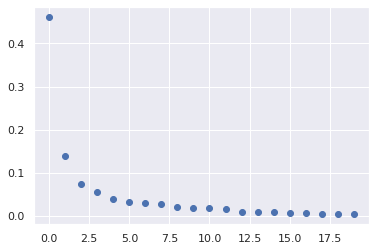

In [924]:
plt.scatter(list(range(0, 20)), sdf['feature importance'])

tn fp fn tp 
 379 37 65 162


Text(0.5, 257.44, 'Predicted label')

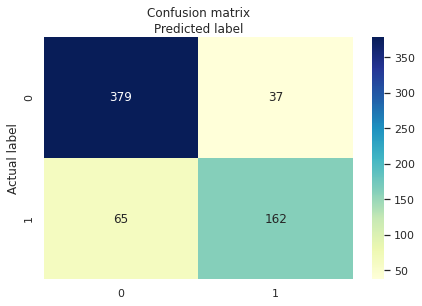

In [914]:
y_pred = best_tree.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
tn, fp, fn, tp = cm.ravel()
print ('tn', 'fp', 'fn', 'tp', '\n', tn, fp, fn, tp)

class_names = ['promoters', 'non-promoters']
fig, ax = plt.subplots()
marks = np.arange(len(class_names))
plt.xticks(marks, class_names)
plt.yticks(marks, class_names)

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [968]:
print("Recall : ", recall_score(ytest, y_pred))
print("Presision : ", precision_score(ytest, y_pred))
print("F1-score : ", f1_score(ytest, y_pred))
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Recall :  0.7136563876651982
Presision :  0.8140703517587939
F1-score :  0.7605633802816901
Accuracy :  0.8413685847589425


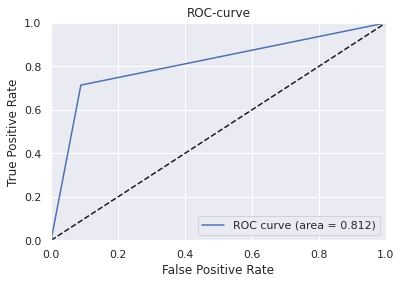

In [916]:
fpr, tpr, thresholds = roc_curve(ytest, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.legend(loc="lower right")

In [300]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [564]:
def sigmoid(x):
    return 1 / (1 * np.exp(-x))


def sigmoid_derivatives(x):
    return x * (1 - x)
        
        
training_inputs = np.array([[0, 0, 1],
                            [1, 1, 1],
                            [1, 0, 1],
                            [0, 1, 1]])

training_outputs = np.array([[0, 1, 1, 0]]).T

print('Random starting synaptic weights')
print(synaptic_weights)
errors = []
for inter in range(1):
    input_layer = training_inputs

    outputs = sigmoid(np.dot(input_layer, synaptic_weights))

    error = training_outputs - outputs

    adjustments = error * sigmoid_derivatives(outputs)

    synaptic_weights += np.dot(input_layer.T, adjustments)
    if inter % 100 == 0:
        errors.append(error)

print('Outputs after training')
print(outputs)

Random starting synaptic weights
[[ 6.19013761e+00]
 [-2.04244075e-03]
 [-6.19014470e+00]]
Outputs after training
[[0.00204953]
 [0.99795256]
 [0.99999291]
 [0.00204535]]


In [751]:
xtrain = data.iloc[2:4,0:20].values
ytrain = data.iloc[0:20,-1].values
ytrain

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [720]:
x = [0, 0, 1]
y = [2.14340137e-03,  4.96569284e-04,  4.99301299e-04,  8.75947141e-04,
     1.12563895e-03, -6.59560680e-04, -2.14062131e-04,  4.51869919e-04,
     6.89587020e-04, -1.05407102e-03,  1.18155610e-03, -1.99503220e-04,
     1.03848492e-04, -5.86311953e-04,  7.95478533e-04,  3.54950361e-05,
     1.32042349e-04, -4.17813038e-04, -5.56714589e-04,  4.04664704e-04,
     5.07470248e-04, -9.87816534e-04, -3.46074972e-04,  3.03272770e-04,
     -2.64814851e-04, -9.51442165e-04,  8.94494168e-04,  1.02445974e-04,
     4.43825744e-05, -1.79026901e-04]

def multiplying(a, b):
        c = []
        for i in range(len(a)):
            one = []
            for j in range(len(b)):
                one.append(a[i] * b[j])
            c.append(one)
        return np.array(c)
    
multiplying(x, y)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+

In [883]:
import numpy as np

X = np.array(([30, 11, 7, 12, 37, 0, 0, 0, 0, 0, 8, 4, 3, 4, 4, 2, 3, 4, 2, 2], 
              [33, 15, 7, 11, 47, 0, 0, 0, 0, 0, 6, 5, 3, 4, 5, 3, 3, 5, 3, 3], 
              [53, 20, 17, 16, 0, 0, 0, 0, 0, 0, 2, 1, 7, 2, 2, 4, 6, 4, 3, 7], 
              [38, 10, 13, 15, 0, 0, 0, 0, 0, 0, 4, 5, 4, 4, 4, 2, 4, 4, 5, 5]), dtype=float)
y = np.array(([1], [1], [0], [0]), dtype=float)

#X = data.iloc[0:4,0:20].values
#y = data.iloc[0:4,-1].values
def implem(inputs):
    out = []
    for i in inputs:
        out.append([i])
    return np.array(out)

#y = implem(y)
#print(X)
#print(y)


class NeuralNetwork(object):
    def __init__(self):
        self.inputSize = 27
        self.hiddenSize = 30
        self.outputSize = 1
  
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize)
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) 
        
    def feedForward(self, X):
        self.z = np.dot(X, self.W1) 
        self.z2 = self.sigmoid(self.z) 
        self.z3 = np.dot(self.z2, self.W2) 
        output = self.sigmoid(self.z3)
        return output
    
    def binary(self, s, deriv=False):
        if deriv == True:
            return
        return 1 if s > 
        
    def sigmoid(self, s, deriv=False):
        if deriv == True:
            return s * (1 - s)
        return 1/(1 + np.exp(-s))
    
    def backward(self, X, y, output):
        self.output_error = y - output 
        self.output_delta = self.output_error * self.sigmoid(output, deriv=True)
        
        self.z2_error = self.output_delta.dot(self.W2.T) 
        self.z2_delta = self.z2_error * self.sigmoid(self.z2, deriv=True) 
        
        self.W1 += X.T.dot(self.z2_delta) 
        self.W2 += self.z2.T.dot(self.output_delta) 
        
    def train(self, X, y):
        output = self.feedForward(X)
        self.backward(X, y, output)
        
NN = NeuralNetwork()

for i in range(1000): 
    if (i % 100 == 0):
        print("Loss: " + str(np.mean(np.square(y - NN.feedForward(X)))))
    NN.train(X, y)
        
print("Input: " + str(X))
print("Actual Output: " + str(y))
print("Loss: " + str(np.mean(np.square(y - NN.feedForward(X)))))
print("\n")
print("Predicted Output: " + str(NN.feedForward(X)))

Loss: 0.9004714037528958
Loss: 0.0005042409015893088
Loss: 0.0002689758185162534
Loss: 0.00018298317377795473
Loss: 0.0001385198070737409
Loss: 0.00011138280590426914
Loss: 9.310729531447401e-05
Loss: 7.996701648397045e-05
Loss: 7.006675560293908e-05
Loss: 6.234113114073203e-05
Input: [[30. 11.  7. 12. 37.  0.  0.  0.  0.  0.  8.  4.  3.  4.  4.  2.  3.  4.
   2.  2.]
 [33. 15.  7. 11. 47.  0.  0.  0.  0.  0.  6.  5.  3.  4.  5.  3.  3.  5.
   3.  3.]
 [53. 20. 17. 16.  0.  0.  0.  0.  0.  0.  2.  1.  7.  2.  2.  4.  6.  4.
   3.  7.]
 [38. 10. 13. 15.  0.  0.  0.  0.  0.  0.  4.  5.  4.  4.  4.  2.  4.  4.
   5.  5.]]
Actual Output: [[1.]
 [1.]
 [0.]
 [0.]]
Loss: 5.6145404138136177e-05


Predicted Output: [[0.99256897]
 [0.99256908]
 [0.00754638]
 [0.00756274]]


In [758]:
y = data.iloc[0:4,-1].values
def implem(inputs):
    out = []
    for i in inputs:
        out.append([i])
    return np.array(out)
implem(y)

array([[1],
       [1],
       [1],
       [1]])

In [772]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, DBSCAN, AgglomerativeClustering, estimate_bandwidth
import seaborn as sns; sns.set()
import numpy as np
from itertools import cycle
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

In [878]:
data_x = pd.read_csv('/home/nkureev/feauters_for_clusterization.txt', header=None)
xtrain = data_x.iloc[0:71,0:20].values
ytrain = data_x.iloc[0:71,-1].values

# x = df.iloc[1:, 1:].values
x = xtrain
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])

principalDf

,principal_component_1,principal_component_2
0,3.555400,-1.535376
1,3.429524,0.080049
2,3.155633,-1.106295
3,0.767616,-1.592605
4,0.675302,1.836491
...,...,...
66,-2.277123,-0.288553
67,-1.629873,-0.584574
68,-0.275441,-1.106775
69,0.092264,0.685351


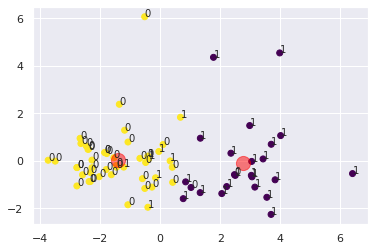

In [871]:
### K-MEANS

kmeans = KMeans(n_clusters = 2).fit(principalDf)
y_kmeans = kmeans.predict(principalDf)
plt.scatter(principalDf.principal_component_1, principalDf.principal_component_2, c=y_kmeans, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

for e, i in enumerate(ytrain):
    plt.text(principalDf.principal_component_1[e], principalDf.principal_component_2[e], str(i), size="small")

In [872]:
y_kmeans_rev = y_kmeans[::-1]
print(y_kmeans_rev)
print(ytrain)

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [877]:
kmeans.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int32)

tn fp fn tp 
 22 19 2 28


Text(0.5, 257.44, 'Predicted label')

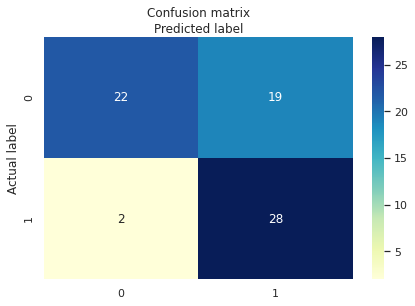

In [875]:
cm = confusion_matrix(ytrain, y_kmeans_rev)
tn, fp, fn, tp = cm.ravel()
print ('tn', 'fp', 'fn', 'tp', '\n', tn, fp, fn, tp)

class_names = ['promoters', 'non-promoters']
fig, ax = plt.subplots()
marks = np.arange(len(class_names))
plt.xticks(marks, class_names)
plt.yticks(marks, class_names)

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Recall : ", recall_score(ytest, y_pred))
print("Presision : ", precision_score(ytest, y_pred))
print("F1-score : ", f1_score(ytest, y_pred))
print ("Accuracy : ", accuracy_score(ytest, y_pred))

In [896]:
#df1 = pd.DataFrame({'x': [1, 2, 3], 'y': ['a', 'b', 'c']})
#df2 = pd.DataFrame({'x': [4, 5, 6], 'y': ['b', 'c', 'd']})
#df = df1.merge(df2, how='outer')
X = data.iloc[0:4,:].values
y = data.iloc[0:4,-1].values
X

array([[30, 11,  7, ...,  0,  0,  1],
       [33, 15,  7, ...,  0,  0,  1],
       [30,  9,  7, ...,  1,  1,  1],
       [36, 14, 12, ...,  0,  0,  1]])

In [961]:
import numpy as np

np.random.seed(100)


class Layer:
    """

    Represents a layer (hidden or output) in our neural network.

    """

    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        """

        :param int n_input: The input size (coming from the input layer or a previous hidden layer)

        :param int n_neurons: The number of neurons in this layer.

        :param str activation: The activation function to use (if any).

        :param weights: The layer's weights.

        :param bias: The layer's bias.

        """

        self.weights = weights if weights is not None else np.random.rand(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.rand(n_neurons)
        self.last_activation = None
        self.error = None
        self.delta = None

    def activate(self, x):
        """

        Calculates the dot product of this layer.

        :param x: The input.

        :return: The result.

        """

        r = np.dot(x, self.weights) + self.bias
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        """

        Applies the chosen activation function (if any).

        :param r: The normal value.

        :return: The "activated" value.

        """

        # In case no activation function was chosen

        if self.activation is None:
            return r

        # tanh

        if self.activation == 'tanh':
            return np.tanh(r)

        # sigmoid

        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        
        
        if self.activation == 'binary':
            return np.where(r > 0.5, 1, 0)

        return r

    def apply_activation_derivative(self, r):
        """

        Applies the derivative of the activation function (if any).

        :param r: The normal value.

        :return: The "derived" value.

        """

        # We use 'r' directly here because its already activated, the only values that

        # are used in this function are the last activations that were saved.


        if self.activation is None:
            return r

        if self.activation == 'tanh':
            return 1 - r ** 2

        if self.activation == 'sigmoid':
            return r * (1 - r)
        
        if self.activation == 'binary':
            return r

        return r


class NeuralNetwork:
    """

    Represents a neural network.

    """

    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        """

        Adds a layer to the neural network.

        :param Layer layer: The layer to add.

        """

        self._layers.append(layer)

    def feed_forward(self, X):
        """

        Feed forward the input through the layers.

        :param X: The input values.

        :return: The result.

        """

        for layer in self._layers:
            X = layer.activate(X)

        return X

    def predict(self, X):
        """

        Predicts a class (or classes).

        :param X: The input values.

        :return: The predictions.

        """

        ff = self.feed_forward(X)

        # One row

        if ff.ndim == 1:
            return np.argmax(ff)

        # Multiple rows

        return np.argmax(ff, axis=1)

    def backpropagation(self, X, y, learning_rate):
        """

        Performs the backward propagation algorithm and updates the layers weights.

        :param X: The input values.

        :param y: The target values.

        :param float learning_rate: The learning rate (between 0 and 1).

        """

        # Feed forward for the output

        output = self.feed_forward(X)

        # Loop over the layers backward

        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]

            # If this is the output layer

            if layer == self._layers[-1]:
                layer.error = y - output
                # The output = layer.last_activation in this case

                layer.delta = layer.error * layer.apply_activation_derivative(output)
            else:
                next_layer = self._layers[i + 1]
                layer.error = np.dot(next_layer.weights, next_layer.delta)
                layer.delta = layer.error * layer.apply_activation_derivative(layer.last_activation)

        # Update the weights

        for i in range(len(self._layers)):
            layer = self._layers[i]
            # The input is either the previous layers output or X itself (for the first hidden layer)

            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.delta * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        """

        Trains the neural network using backpropagation.

        :param X: The input values.

        :param y: The target values.

        :param float learning_rate: The learning rate (between 0 and 1).

        :param int max_epochs: The maximum number of epochs (cycles).

        :return: The list of calculated MSE errors.

        """

        mses = []

        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            if i % 10 == 0:
                mse = np.mean(np.square(y - nn.feed_forward(X)))
                mses.append(mse)
                print('Epoch: #%s, MSE: %f' % (i, float(mse)))

        return mses

    @staticmethod
    def accuracy(y_pred, y_true):
        """

        Calculates the accuracy between the predicted labels and true labels.

        :param y_pred: The predicted labels.

        :param y_true: The true labels.

        :return: The calculated accuracy.

        """

        return (y_pred == y_true).mean()

In [938]:
data = pd.read_csv('/home/nkureev/Features.csv', header=None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
def implem(inputs):
    out = []
    for i in inputs:
        out.append([i])
    return np.array(out)

y = implem(y)

Epoch: #0, MSE: 0.327394
Epoch: #10, MSE: 0.327382
Epoch: #20, MSE: 0.327303
Epoch: #30, MSE: 0.327179
Epoch: #40, MSE: 0.326984
Epoch: #50, MSE: 0.326681
Epoch: #60, MSE: 0.326221
Epoch: #70, MSE: 0.325594
Epoch: #80, MSE: 0.324862
Epoch: #90, MSE: 0.324125
Epoch: #100, MSE: 0.323465
Epoch: #110, MSE: 0.322919
Epoch: #120, MSE: 0.322487
Epoch: #130, MSE: 0.322151
Epoch: #140, MSE: 0.321890
Epoch: #150, MSE: 0.321686
Epoch: #160, MSE: 0.321526
Epoch: #170, MSE: 0.321398
Epoch: #180, MSE: 0.321294
Epoch: #190, MSE: 0.321209
Epoch: #200, MSE: 0.321139
Epoch: #210, MSE: 0.321080
Epoch: #220, MSE: 0.321031
Epoch: #230, MSE: 0.320989
Epoch: #240, MSE: 0.320953
Epoch: #250, MSE: 0.320922
Epoch: #260, MSE: 0.320895
Epoch: #270, MSE: 0.320872
Epoch: #280, MSE: 0.320851
Epoch: #290, MSE: 0.320833
Accuracy: 65.39%


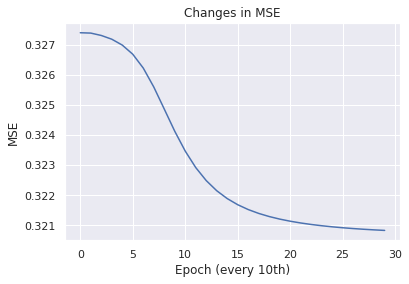

In [966]:
nn = NeuralNetwork()
nn.add_layer(Layer(27, 1, 'tanh'))
nn.add_layer(Layer(1, 2, 'sigmoid'))
nn.add_layer(Layer(2, 3, 'sigmoid'))

# Define dataset

# X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# y = np.array([[0], [0], [0], [1]])

# Train the neural network

errors = nn.train(X, y, 0.3, 300)
res = nn.predict(X)
print('Accuracy: %.2f%%' % (nn.accuracy(res, y.flatten()) * 100))

# Plot changes in mse

plt.plot(errors)
plt.title('Changes in MSE')
plt.xlabel('Epoch (every 10th)')
plt.ylabel('MSE')
plt.show()

tn fp fn tp 
 1400 741 0 0


Text(0.5, 257.44, 'Predicted label')

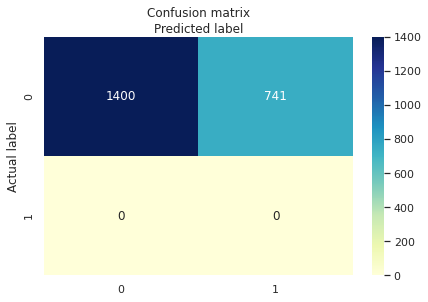

In [967]:
cm = confusion_matrix(res, y.flatten())
tn, fp, fn, tp = cm.ravel()
print ('tn', 'fp', 'fn', 'tp', '\n', tn, fp, fn, tp)

class_names = ['promoters', 'non-promoters']
fig, ax = plt.subplots()
marks = np.arange(len(class_names))
plt.xticks(marks, class_names)
plt.yticks(marks, class_names)

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [1232]:
class Layer():
    
    def __init__(self, number_of_inputs, number_of_outputs):
        self.number_of_inputs = number_of_inputs
        self.number_of_outputs = number_of_outputs
        
        self.weights = []
        for i in range(self.number_of_outputs):
            neuron = []
            for j in range(self.number_of_inputs):
                weight = np.random.random()
                neuron.append(weight) 
            self.weights.append(neuron)
    
    
    def get_neurons(self):
        return self.weights
    

def sigmoid(s, deriv=False):
        if deriv == True:
            return s * (1 - s)
        return 1/(1 + np.exp(-s))
    
    
class NeuralNetwork():
    
    def __init__(self, layers_info):
        
        # layers info - list of numbers of neurons in each layer
        
        self.layers_info = layers_info
        
        self.layers_list = []
        for i in range(len(self.layers_info) - 1):
            self.layers_list.append(Layer(self.layers_info[i], self.layers_info[i + 1]))
            
            
    def get_layers(self):
        return self.layers_list
    
    
    def feedforward(self, inputs):
        input_layer = True
        data = inputs
        for layer in self.layers_list:
            print(layer.weights)
               
                
    
NN = NeuralNetwork([1, 2, 3, 1])
NN.feedforward([[2, 3]])

[[0.6485677467015812], [0.20966342793690096]]
[[0.1503229962668694, 0.5255393530109397], [0.09659221629207138, 0.27807213466313285], [0.6220070750199936, 0.32846747864695935]]
[[0.9629718107790034, 0.42257797624850235, 0.3992161472933671]]
The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [1231]:
a = [[1, 2]]
b = [[1], [2]]

def multiplier(inputs, weights):
    result = []
    for neurons in weights:
        result.append(np.dot(inputs, neurons))
    return result

multiplier(a, b)

[array([1]), array([4])]